# Assignment Overview


## Background Story  

In the ever-evolving landscape of e-commerce, understanding customer behavior has become a cornerstone of strategic marketing. An emerging e-commerce giant, "FarTrend," has experienced rapid growth by offering a wide range of products from fashion to electronics, catering to over 3400 customers across diverse demographics. Despite their success, FarTrend faces challenges in personalizing marketing efforts and predicting future purchasing behavior, crucial for sustaining growth and enhancing customer satisfaction.

## The Challenge

FarTrend's extensive customer database reveals purchasing patterns over the past year but lacks actionable insights to anticipate the needs of new customers. Traditional marketing strategies have yielded moderate success; however, the leadership team believes that a more data-driven approach could unlock exponential growth.

You are working on the marketing intelligence team! Your goal is to develop a  machine learning model that segments FarTrend's customer base and predicts future purchases of new customers within their first year. This model aims to transform FarTrend approach to customer engagement by delivering personalized marketing campaigns and tailored product recommendations.

## Data Description

The IT extracted a dataframe with the main transaction performed by the customers. 

##### Variables
InvoiceNo: Invoice number. A 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. A 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name.

Quantity: The quantities of each product (item) per transaction. 

InvoiceDate: The day and time when each transaction was generated.

UnitPrice: Product price per unit.

CustomerID: Unique customer number. 

Country: The name of the country where each customer resides.

## Question 1: Data Quality and Customer Understanding (30 points)

#### Q1.1 Please perform the exploratory data analysis of the data. (20 points)


In [1]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# load the data set
retail_raw = pd.read_excel("/Users/simon/Root/Life/Learning/Nova Master/Semester 2/T3/Machine Learning/Assignment 2/FarTrend_eRetail.xlsx")

#### Data Information

In [4]:
retail_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
retail_raw['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [6]:
retail_raw.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
retail_raw.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
retail_raw.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
retail_raw['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [10]:
european_community = retail_raw[retail_raw['Country'] == "European Community"]
european_community

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
168149,551013,22839,3 TIER CAKE TIN GREEN AND CREAM,1,2011-04-26 10:54:00,14.95,15108.0,European Community
168150,551013,22840,ROUND CAKE TIN VINTAGE RED,2,2011-04-26 10:54:00,7.95,15108.0,European Community
168151,551013,22841,ROUND CAKE TIN VINTAGE GREEN,2,2011-04-26 10:54:00,7.95,15108.0,European Community
168152,551013,22457,NATURAL SLATE HEART CHALKBOARD,6,2011-04-26 10:54:00,2.95,15108.0,European Community
168153,551013,22314,OFFICE MUG WARMER CHOC+BLUE,6,2011-04-26 10:54:00,2.95,15108.0,European Community
...,...,...,...,...,...,...,...,...
273232,560783,21098,CHRISTMAS TOILET ROLL,12,2011-07-21 10:24:00,1.25,15108.0,European Community
273233,560783,72807C,SET/3 VANILLA SCENTED CANDLE IN BOX,12,2011-07-21 10:24:00,4.25,15108.0,European Community
273234,560783,85036B,CHOCOLATE 1 WICK MORRIS BOX CANDLE,12,2011-07-21 10:24:00,4.25,15108.0,European Community
273235,560783,85035C,ROSE 3 WICK MORRIS BOX CANDLE,8,2011-07-21 10:24:00,4.25,15108.0,European Community


In [11]:
retail_raw.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

#### Consistency

In [12]:
# Drop rows where quantity is negative
retail_consistency_1 = retail_raw.copy()

retail_consistency_1 = retail_consistency_1[retail_consistency_1['Quantity'] >= 1]
retail_consistency_1.head(50)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [13]:
retail_consistency_1.isna().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133361
Country             0
dtype: int64

In [14]:
# Convert StockCode to string to ensure all operations can be applied
retail_consistency_1['StockCode'] = retail_consistency_1['StockCode'].astype(str)
retail_consistency_1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [15]:

# Create a new column 'StockCodeSuffix' to capture the last character (now safely assuming all entries are strings)
retail_consistency_1["StockCodeSuffix"] = retail_consistency_1['StockCode'].apply(lambda x: x[-1] if x[-2:].isnumeric() == False else '')

# Adjust 'StockCode' to keep only the first 4 characters
retail_consistency_1['StockCode'] = retail_consistency_1['StockCode'].apply(lambda x: x[:4])

retail_consistency_1


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,StockCodeSuffix
0,536365,8512,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,A
1,536365,7105,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,
2,536365,8440,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,B
3,536365,8402,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,G
4,536365,8402,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,E
...,...,...,...,...,...,...,...,...,...
541904,581587,2261,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,
541905,581587,2289,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,
541906,581587,2325,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,
541907,581587,2325,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,


In [16]:
retail_consistency_1.dtypes 

InvoiceNo                  object
StockCode                  object
Description                object
Quantity                    int64
InvoiceDate        datetime64[ns]
UnitPrice                 float64
CustomerID                float64
Country                    object
StockCodeSuffix            object
dtype: object

In [17]:
# Drop rows where unit price is negative

retail_consistency_2 = retail_consistency_1.copy()
retail_consistency_2 = retail_consistency_2[retail_consistency_2['UnitPrice'] > 0]
retail_consistency_2.head(50)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,StockCodeSuffix
0,536365,8512,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,A
1,536365,7105,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,
2,536365,8440,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,B
3,536365,8402,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,G
4,536365,8402,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,E
5,536365,2275,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,
6,536365,2173,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,
7,536366,2263,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,
8,536366,2263,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,
9,536367,8487,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,


In [18]:
retail_consistency_3 = retail_consistency_2.copy()

retail_consistency_3 = retail_consistency_3[retail_consistency_3['Country'] != "European Community"]
print(retail_consistency_3.describe())
print(retail_consistency_3.info(show_counts=True))

            Quantity      UnitPrice     CustomerID
count  530044.000000  530044.000000  397824.000000
mean       10.542289       3.907521   15294.451569
std       155.532909      35.917682    1713.269214
min         1.000000       0.001000   12346.000000
25%         1.000000       1.250000   13969.000000
50%         3.000000       2.080000   15159.000000
75%        10.000000       4.130000   16796.000000
max     80995.000000   13541.330000   18287.000000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 530044 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   InvoiceNo        530044 non-null  object        
 1   StockCode        530044 non-null  object        
 2   Description      530044 non-null  object        
 3   Quantity         530044 non-null  int64         
 4   InvoiceDate      530044 non-null  datetime64[ns]
 5   UnitPrice        530044 non-null  float64       

In [19]:
retail_consistency_3.isna().sum()

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID         132220
Country                 0
StockCodeSuffix         0
dtype: int64

#### Uniqueness

In [20]:
retail_unique_1 = retail_consistency_3.copy()

# Due to the data description, each invoiceID should map to one customerIDs. This business understanding can be used to fill missing values and inconsistencies.

# Find the max CustomerID to start generating unique IDs from
max_customer_id = retail_unique_1['CustomerID'].max()

# Function to generate new CustomerID where needed
def generate_customer_id(group):
    global max_customer_id
    if group['CustomerID'].isnull().all():  # If all values are NaN in the group
        max_customer_id += 1  # Increment to ensure uniqueness
        group['CustomerID'] = max_customer_id
    return group

# Apply the function to each group of InvoiceNo
retail_unique_1 = retail_unique_1.groupby('InvoiceNo').apply(generate_customer_id)

# Reset index if necessary (apply can sometimes change the index)
retail_unique_1.reset_index(drop=True, inplace=True)

retail_unique_1

/var/folders/6q/cbfnzq6520s5218jsw51rpg40000gn/T/ipykernel_28222/1278373895.py:17: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  retail_unique_1 = retail_unique_1.groupby('InvoiceNo').apply(generate_customer_id)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,StockCodeSuffix
0,536365,8512,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,A
1,536365,7105,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,
2,536365,8440,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,B
3,536365,8402,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,G
4,536365,8402,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,E
...,...,...,...,...,...,...,...,...,...
530039,581587,2261,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,
530040,581587,2289,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,
530041,581587,2325,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,
530042,581587,2325,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,


In [21]:
retail_unique_1.isna().sum()

InvoiceNo          0
StockCode          0
Description        0
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID         0
Country            0
StockCodeSuffix    0
dtype: int64

Missing values cleaned and inconsistencies reduced. 
Each unique invoiceID is mapped to a unique customerID  

In [22]:
retail_eda_1 = retail_unique_1.copy()

In [23]:
retail_eda_1.dtypes

InvoiceNo                  object
StockCode                  object
Description                object
Quantity                    int64
InvoiceDate        datetime64[ns]
UnitPrice                 float64
CustomerID                float64
Country                    object
StockCodeSuffix            object
dtype: object

Convert invoice number and customerID into objects,so they don't influence the model later on.

In [24]:
retail_eda_1['CustomerID'] = retail_eda_1['CustomerID'].astype(str)

In [25]:
retail_eda_1.dtypes

InvoiceNo                  object
StockCode                  object
Description                object
Quantity                    int64
InvoiceDate        datetime64[ns]
UnitPrice                 float64
CustomerID                 object
Country                    object
StockCodeSuffix            object
dtype: object

#### Outlier detection

In [26]:
retail_eda_distribution = retail_eda_1.copy()

Addressing outliers in Quantity variable

Text(0.5, 1.0, 'Boxplot for Quantity Variable before removing outliers')

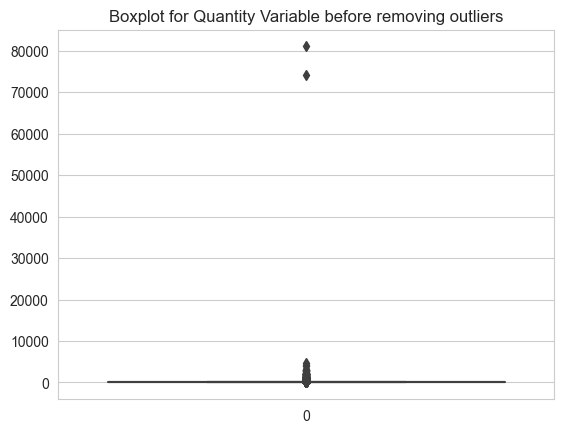

In [27]:
sns.boxplot(retail_eda_distribution['Quantity']).set_title('Boxplot for Quantity Variable before removing outliers')


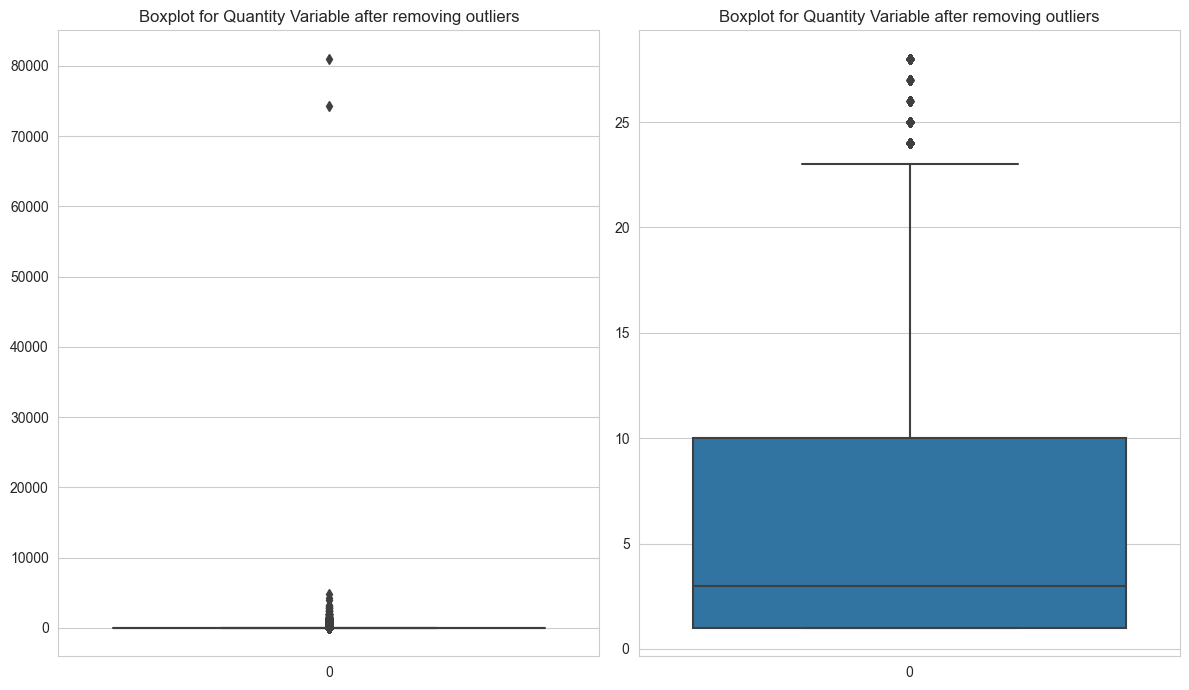

In [339]:
variable = 'Quantity'
eda_quantity = retail_eda_distribution.copy()

Q1 = eda_quantity[variable].quantile(0.25)
Q3 = eda_quantity[variable].quantile(0.75)

IQR = Q3-Q1

upper_bound = 2
lower_bound = 1.5

eda_quantity = eda_quantity[~((eda_quantity[variable]<(Q1-lower_bound*IQR)) | (eda_quantity[variable]>(Q3+upper_bound*IQR)))]
# Plotting the boxplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 7))  # Create a figure and a set of subplots

# Boxplot before removing outliers
sns.boxplot(retail_eda_distribution['Quantity'], ax=axes[0])
axes[0].set_title('Boxplot for Quantity Variable after removing outliers')

# Boxplot after removing outliers
sns.boxplot(eda_quantity['Quantity'], ax=axes[1])
axes[1].set_title("Boxplot for Quantity Variable after removing outliers")

plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()  # Display the plots


In [30]:
# removing outliers for unit price variable

eda_unit_price = eda_quantity.copy()

variable = "UnitPrice"

Q1 = eda_unit_price[variable].quantile(0.25)
Q3 = eda_unit_price[variable].quantile(0.75)

IQR = Q3-Q1

upper_bound = 1.5
lower_bound = 1.5

eda_unit_price = eda_unit_price[~((eda_unit_price[variable]<(Q1-lower_bound*IQR)) | (eda_unit_price[variable]>(Q3+upper_bound*IQR)))]

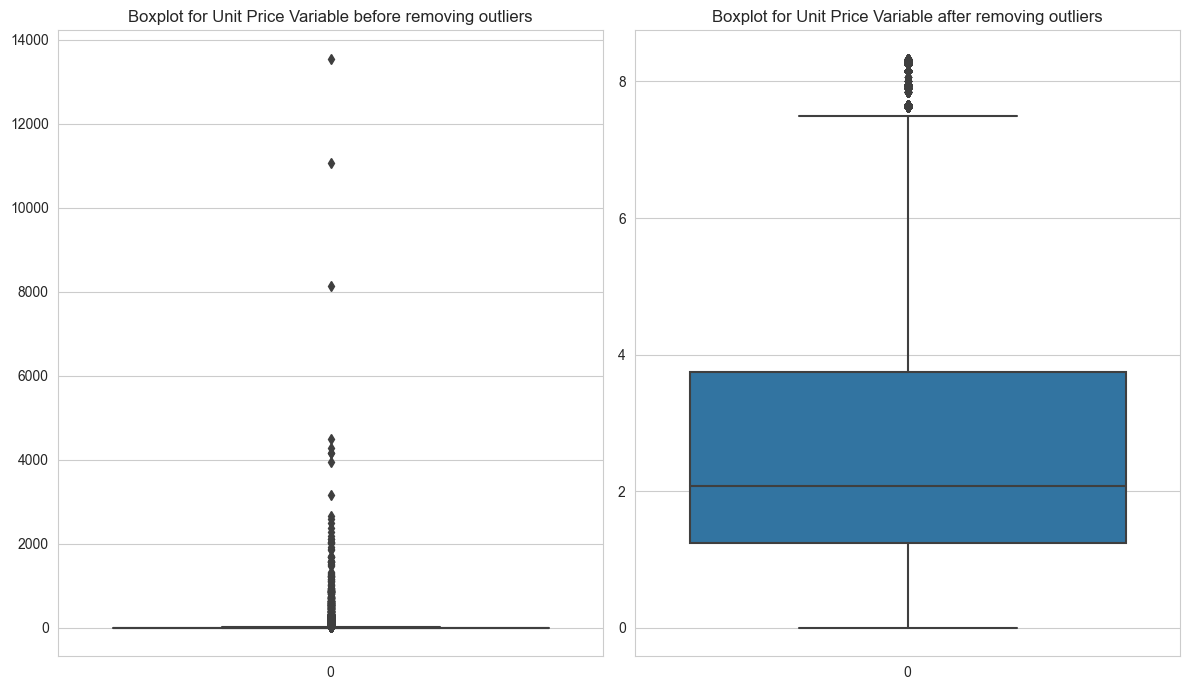

In [31]:
# Plotting the boxplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 7))  # Create a figure and a set of subplots

# Boxplot before removing outliers
sns.boxplot(eda_quantity['UnitPrice'], ax=axes[0])
axes[0].set_title("Boxplot for Unit Price Variable before removing outliers")

# Boxplot after removing outliers
sns.boxplot(eda_unit_price['UnitPrice'], ax=axes[1])
axes[1].set_title("Boxplot for Unit Price Variable after removing outliers")

plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()  # Display the plots


In [32]:
eda_final = eda_unit_price.copy()

#### Univariate EDA

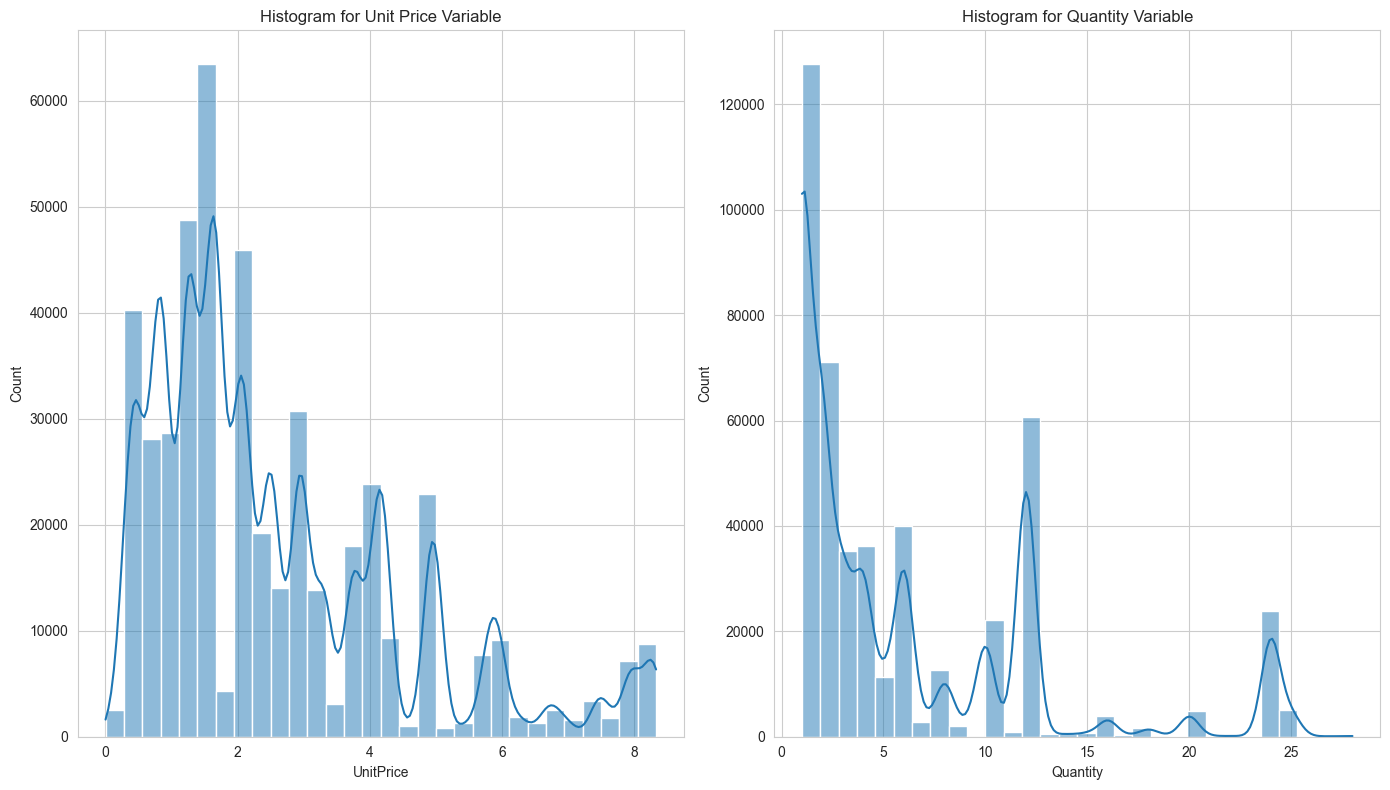

In [33]:
# plotting the distribution for unit price and quantity variables

fig, axes = plt.subplots(1, 2, figsize=(14, 8))

sns.histplot(eda_final['UnitPrice'], kde=True, bins=30, ax=axes[0])
axes[0].set_title("Histogram for Unit Price Variable")

sns.histplot(eda_final['Quantity'], kde=True, bins=30, ax=axes[1])
axes[1].set_title("Histogram for Quantity Variable")

plt.tight_layout()
plt.show()

In [34]:
eda_final

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,StockCodeSuffix
0,536365,8512,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,A
1,536365,7105,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,
2,536365,8440,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,B
3,536365,8402,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,G
4,536365,8402,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,E
...,...,...,...,...,...,...,...,...,...
530039,581587,2261,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,
530040,581587,2289,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,
530041,581587,2325,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,
530042,581587,2325,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,


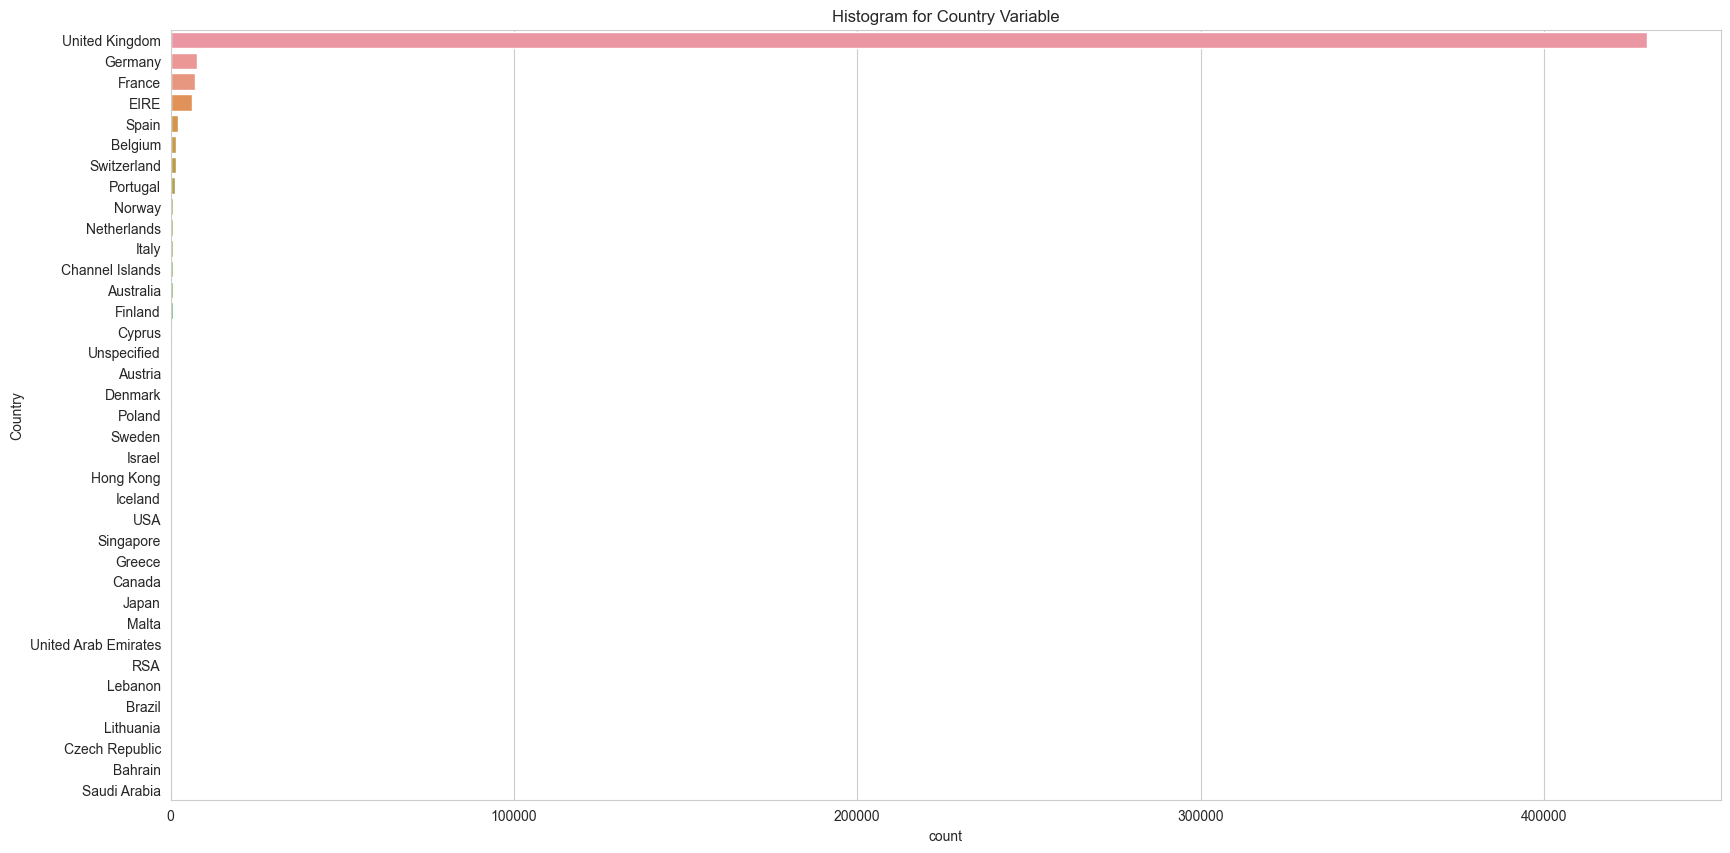

In [50]:
# Plotting distribution for the categorical variables Country, Description, Stock Code
eda_no_uk = eda_final[eda_final['Country'] != "United Kingdom"]

country_order = eda_final['Country'].value_counts().index

plt.figure(figsize=(20,10))
sns.countplot(data=eda_final, y="Country", order=country_order).set_title("Histogram for Country Variable")

plt.show()

Very high amount of UK orders can distort data and introduce bias later on in the modeling phase.

K-Means is sensitive to outliers and dominant groups of data.

If the clustering algorithm is sensitive to the scale of the data, UK customers might form a cluster not because they share distinct purchasing patterns but simply because there are so many of them.

A large cluster of UK orders could overshadow smaller, yet potentially more interesting clusters.

Different approaches to handling this issue include stratified sampling, segmentation between Non-UK and UK. 

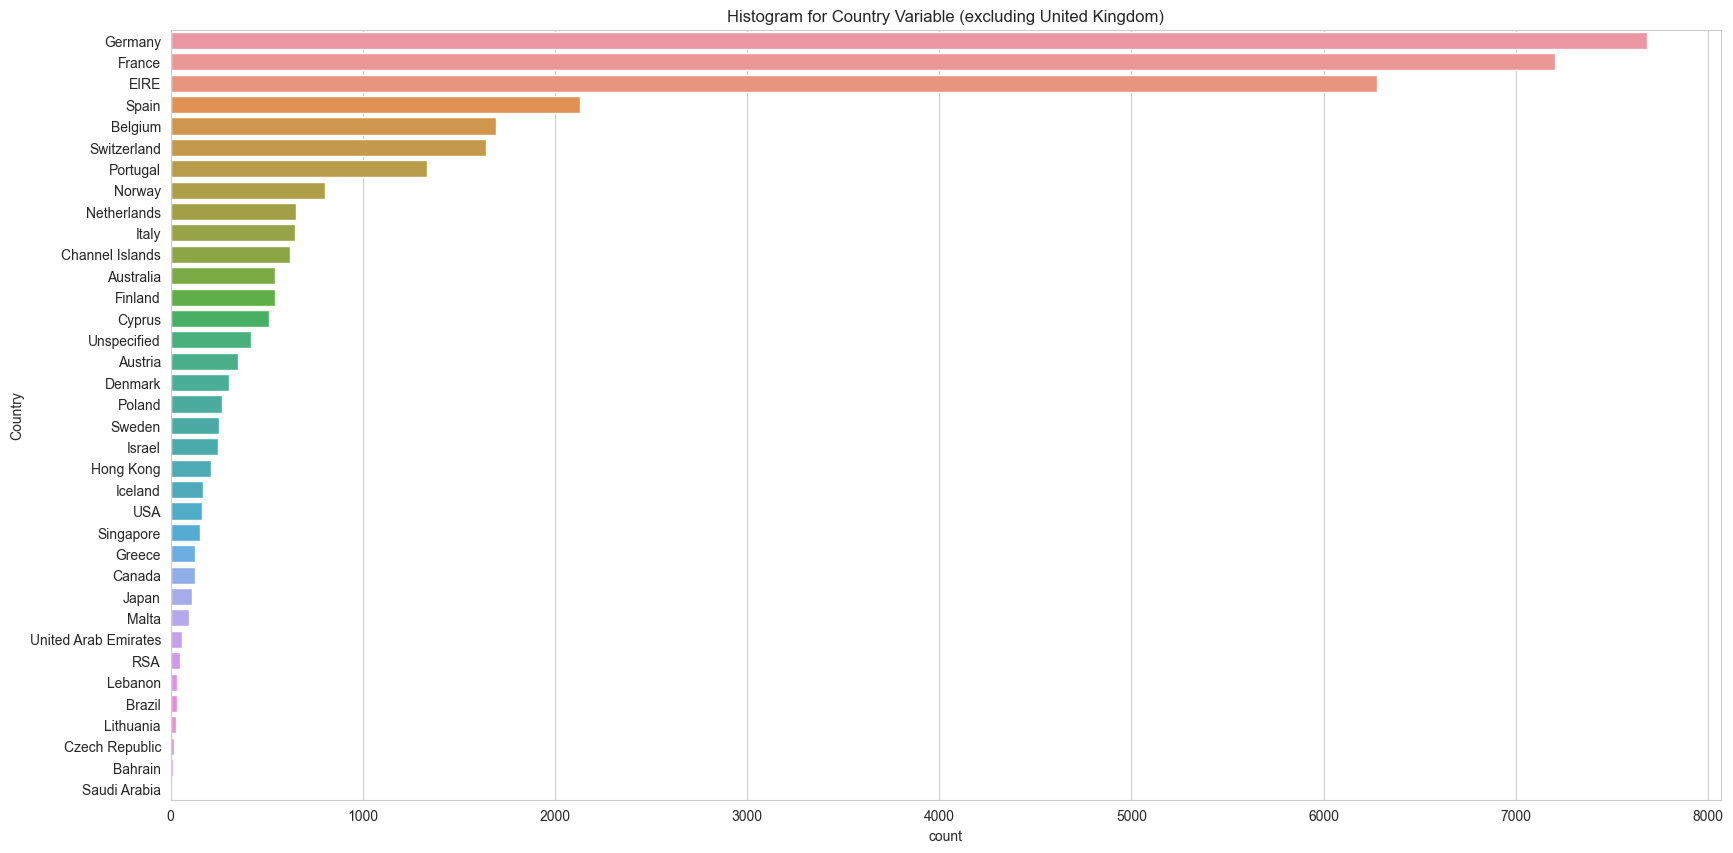

In [49]:
# Plotting distribution for the categorical variables Country, Description, Stock Code
eda_no_uk = eda_final[eda_final['Country'] != "United Kingdom"]

country_order = eda_no_uk['Country'].value_counts().index

plt.figure(figsize=(20,10))
sns.countplot(data=eda_no_uk, y="Country", order=country_order).set_title("Histogram for Country Variable (excluding United Kingdom)")

plt.show()


,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,StockCodeSuffix
3889,17841.0,7530,7530,7530,7530,7530,7530,7530,7530
1831,14911.0,4724,4724,4724,4724,4724,4724,4724,4724
1252,14096.0,4603,4603,4603,4603,4603,4603,4603,4603
323,12748.0,4304,4304,4304,4304,4304,4304,4304,4304
1617,14606.0,2538,2538,2538,2538,2538,2538,2538,2538
...,...,...,...,...,...,...,...,...,...
2597,15998.0,493,493,493,493,493,493,493,493
4198,18292.0,493,493,493,493,493,493,493,493
1442,14367.0,491,491,491,491,491,491,491,491
5459,19621.0,490,490,490,490,490,490,490,490


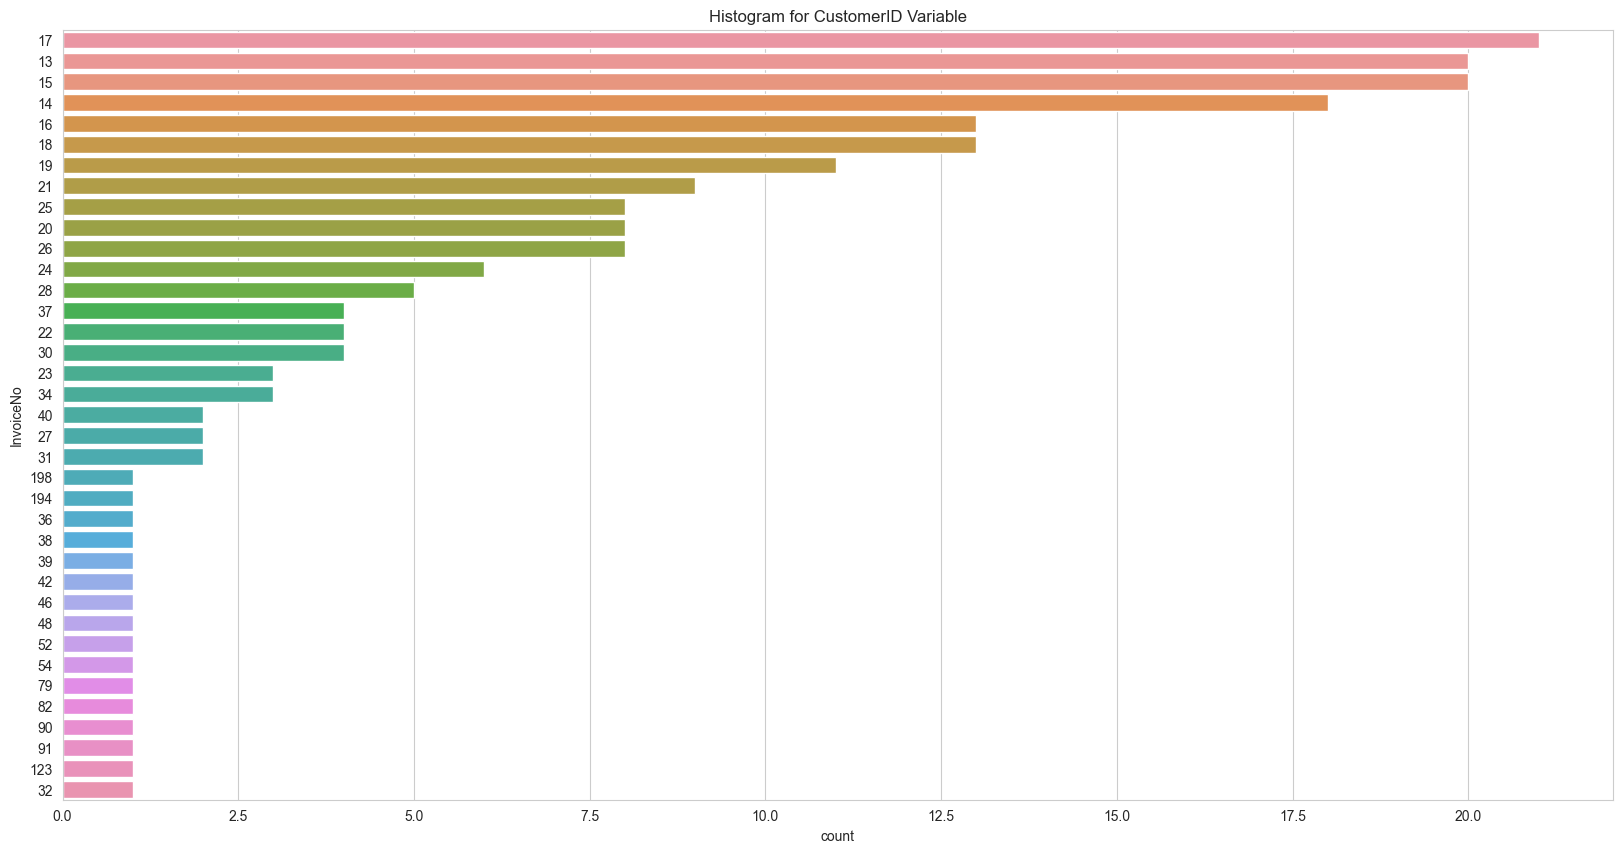

In [71]:
customer_count = eda_final.groupby('CustomerID').nunique().reset_index()
customer_count = customer_count.nlargest(n=200, columns="InvoiceNo")

order = customer_count['InvoiceNo'].value_counts().index

plt.figure(figsize=(20,10))
sns.countplot(data=customer_count, y="InvoiceNo", order=order).set_title("Histogram for CustomerID Variable")

plt.show()

In [70]:
customer_count.head(100)

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,StockCodeSuffix
323,12748.0,198,458,1653,24,199,72,1,20
1831,14911.0,194,438,1617,17,194,65,1,18
3889,17841.0,123,383,1264,25,123,54,1,18
2115,15311.0,91,233,544,24,91,52,1,15
1617,14606.0,90,267,771,22,92,47,1,19
...,...,...,...,...,...,...,...,...,...
74,12437.0,18,67,105,11,18,26,1,3
102,12474.0,18,130,237,15,18,29,1,10
487,13004.0,18,140,267,13,18,32,1,11
773,13418.0,18,86,208,16,18,29,1,6


In [307]:
eda_final.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'StockCodeSuffix'],
      dtype='object')

<Axes: xlabel='UnitPrice', ylabel='Quantity'>

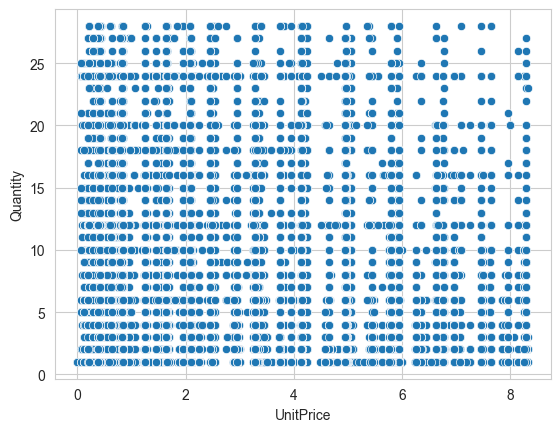

In [94]:
sns.scatterplot(data=eda_final, x=eda_final['UnitPrice'], y=eda_final['Quantity'])

In [92]:
eda_year_month_group = eda_final.copy()

eda_year_month_group["Invoice_Value"] = eda_year_month_group["UnitPrice"]*eda_year_month_group["Quantity"]

grouped = eda_year_month_group.groupby([eda_year_month_group['InvoiceDate'].dt.year,eda_year_month_group['InvoiceDate'].dt.month])

monthly_sales = grouped.sum("Invoice_Value")

In [90]:
print(monthly_sales)

                         Quantity   UnitPrice  Invoice_Value
InvoiceDate InvoiceDate                                     
2010        12             186022   99926.460     403191.640
2011        1              171805   78926.400     324651.080
            2              144051   64749.520     278648.260
            3              191041   82267.020     361105.890
            4              162440   65785.941     296033.541
            5              205832   84960.160     401720.850
            6              194446   82146.890     365150.760
            7              210803   83493.051     374714.031
            8              208053   75945.110     378258.670
            9              306823  110457.532     565752.362
            10             331644  133240.170     620014.850
            11             424002  188298.270     816674.850
            12             127561   57105.110     246284.330


TypeError: Invalid object type at position 0

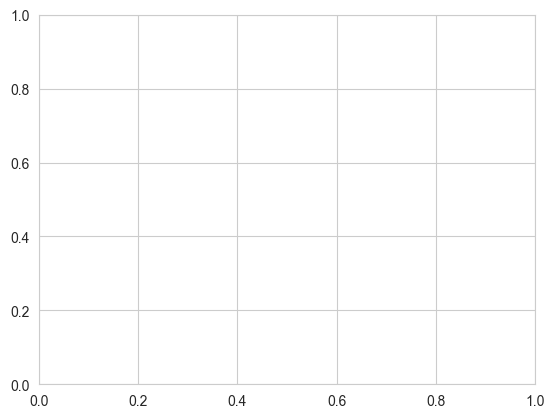

In [93]:
sns.lineplot(monthly_sales)

In [100]:
customer_invoices_grouped = eda_final.groupby(['CustomerID', 'InvoiceDate']).count().reset_index()

In [101]:
customer_invoices_grouped

,CustomerID,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,StockCodeSuffix
0,12347.0,2010-12-07 14:57:00,29,29,29,29,29,29,29
1,12347.0,2011-01-26 14:30:00,28,28,28,28,28,28,28
2,12347.0,2011-04-07 10:43:00,21,21,21,21,21,21,21
3,12347.0,2011-06-09 13:01:00,16,16,16,16,16,16,16
4,12347.0,2011-08-02 08:48:00,20,20,20,20,20,20,20
...,...,...,...,...,...,...,...,...,...
18217,19710.0,2011-12-08 16:14:00,2,2,2,2,2,2,2
18218,19711.0,2011-12-08 16:30:00,566,566,566,566,566,566,566
18219,19712.0,2011-12-09 10:03:00,654,654,654,654,654,654,654
18220,19713.0,2011-12-09 10:23:00,41,41,41,41,41,41,41


#### Bivariate EDA

#### Q1.2 Please describe in two paragraphs the main data insights. Connect the insight with the business  (10 points)


The data presented a few data quality issues that had to be addressed. CustomerID's were missing that had to be filled with new ID values. The StockCode column also presented challenges as it was not a 5 digit code, but had suffixes that had to removed. It turns out, due to missing CustomerID's and filling these with new CustomerID's, around 50% of customers are first time buyers. This can be a significant challenge for segmentation clustering later on as this is a high bias. Therefore, it could make sense to perform clustering for repeated customers and one time buyers. Additionally over 90% of all customers are from the UK. Therefore, the country column should not be brought into the model as a feature as this will create bias for the model.

Inconsistencies in the data occured in the Unit Price and Quantity columns. These had negative values that had to be removed. Handling outliers, especially for machine learning models and within a business context is extremely important. Therefore I removed outliers for the Unit Price and Quantity columns. The boxplots and histograms for these showed a better distribution after removing outliers. 


## Question 2: Segment the clients based on their purchase profile (35 points)

#### Q2.1 Build a baseline model to segment the costumers. (15 points)

#### Feature Engineering

In [35]:
# For an e-commmerce customer segmentation, average order value, frequency of purchases, orders per year, units per transaction, average unit revenue, number of different products the customer bought, total monetary value for the company.

In [107]:
retail_features = eda_final.copy()
retail_features

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,StockCodeSuffix
0,536365,8512,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,A
1,536365,7105,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,
2,536365,8440,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,B
3,536365,8402,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,G
4,536365,8402,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,E
...,...,...,...,...,...,...,...,...,...
530039,581587,2261,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,
530040,581587,2289,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,
530041,581587,2325,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,
530042,581587,2325,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,


In [109]:
retail_features["Order_Value"] = retail_features['Quantity'] * retail_features['UnitPrice']

retail_features

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,StockCodeSuffix,Order_Value
0,536365,8512,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,A,15.30
1,536365,7105,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,,20.34
2,536365,8440,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,B,22.00
3,536365,8402,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,G,20.34
4,536365,8402,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,E,20.34
...,...,...,...,...,...,...,...,...,...,...
530039,581587,2261,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,,10.20
530040,581587,2289,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,,12.60
530041,581587,2325,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,,16.60
530042,581587,2325,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,,16.60


In [110]:
print(retail_features.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365      8512   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365      7105                  WHITE METAL LANTERN         6   
2    536365      8440       CREAM CUPID HEARTS COAT HANGER         8   
3    536365      8402  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365      8402       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country StockCodeSuffix  \
0 2010-12-01 08:26:00       2.55    17850.0  United Kingdom               A   
1 2010-12-01 08:26:00       3.39    17850.0  United Kingdom                   
2 2010-12-01 08:26:00       2.75    17850.0  United Kingdom               B   
3 2010-12-01 08:26:00       3.39    17850.0  United Kingdom               G   
4 2010-12-01 08:26:00       3.39    17850.0  United Kingdom               E   

   Order_Value  
0        15.30  
1        20.34  
2        22.00  
3        20.34  
4      

In [116]:

# group data by customerID to create features for customers

'''retail_features_customer = retail_features.groupby('CustomerID').agg({
    'Quantity' : "sum",
    "Order_Value" : "sum", 
    'StockCode' : "nunique", 
    'InvoiceNo' : "nunique",
    'Description' : "nunique",
    'InvoiceDate' : "min",
    'InvoiceDate' : "max"
    
})
'''
retail_features_customer = retail_features.groupby('CustomerID').agg(
    TotalQuantity = ('Quantity', "sum"),
    TotalValue = ("Order_Value","sum"),
    UniqueStockItems = ('StockCode',"nunique"),
    NumberOfOrders = ('InvoiceNo', "nunique"),
    UniqueProducts = ('Description', "nunique"),
    FirstOrderDate = ('InvoiceDate', "min"),
    LastOrderDate = ('InvoiceDate', "max")
)
retail_features_customer

,TotalQuantity,TotalValue,UniqueStockItems,NumberOfOrders,UniqueProducts,FirstOrderDate,LastOrderDate
CustomerID,,,,,,,
12347.0,1905,3412.53,61,7,97,2010-12-07 14:57:00,2011-12-07 15:52:00
12348.0,140,90.20,6,3,6,2010-12-16 19:09:00,2011-04-05 10:47:00
12349.0,547,1197.15,47,1,64,2011-11-21 09:51:00,2011-11-21 09:51:00
12350.0,196,294.40,14,1,16,2011-02-02 16:01:00,2011-02-02 16:01:00
12352.0,502,1147.44,40,7,50,2011-02-16 12:33:00,2011-11-03 14:37:00
...,...,...,...,...,...,...,...
19710.0,2,3.35,2,1,2,2011-12-08 16:14:00,2011-12-08 16:14:00
19711.0,1424,4015.47,256,1,566,2011-12-08 16:30:00,2011-12-08 16:30:00
19712.0,1735,4696.70,264,1,654,2011-12-09 10:03:00,2011-12-09 10:03:00


In [314]:
country_customer = retail_features.groupby(['CustomerID', 'Country'])["InvoiceNo"].count().reset_index()
country_customer.drop(columns="InvoiceNo",inplace=True)
country_customer

,CustomerID,Country
0,12347.0,Iceland
1,12348.0,Finland
2,12349.0,Italy
3,12350.0,Norway
4,12352.0,Norway
...,...,...
5552,19710.0,United Kingdom
5553,19711.0,United Kingdom
5554,19712.0,United Kingdom
5555,19713.0,United Kingdom


In [139]:
# Group by 'CustomerID' and 'InvoiceNo' to calculate per-order statistics
order_stats = retail_features.groupby(['CustomerID', 'InvoiceNo']).agg(
    Total_Order_Value=pd.NamedAgg(column='Order_Value', aggfunc='sum'),
    Total_Units=pd.NamedAgg(column='Quantity', aggfunc='sum'),
    Total_Products=pd.NamedAgg(column='StockCode', aggfunc=lambda x: x.nunique()),
    Unique_Products=pd.NamedAgg(column='Description', aggfunc='nunique'),
    Invoice_Date=pd.NamedAgg(column='InvoiceDate', aggfunc='min')
)

# Calculate average days between orders
order_stats.reset_index(inplace=True)
order_stats.sort_values(by=['CustomerID', 'Invoice_Date'], inplace=True)
order_stats['Previous_Invoice_Date'] = order_stats.groupby('CustomerID')['Invoice_Date'].shift(1)
order_stats['Days_Between_Orders'] = (order_stats['Invoice_Date'] - order_stats['Previous_Invoice_Date']).dt.days
average_days_between_order = order_stats.groupby('CustomerID')['Days_Between_Orders'].mean().to_frame(name='Average_Days_Between_Orders')
order_stats

,CustomerID,InvoiceNo,Total_Order_Value,Total_Units,Total_Products,Unique_Products,Invoice_Date,Previous_Invoice_Date,Days_Between_Orders
0,12347.0,537626,650.89,253,17,29,2010-12-07 14:57:00,NaT,NaN
1,12347.0,542237,437.14,312,21,28,2011-01-26 14:30:00,2010-12-07 14:57:00,49.0
2,12347.0,549222,325.00,204,16,21,2011-04-07 10:43:00,2011-01-26 14:30:00,70.0
3,12347.0,556201,351.82,158,10,16,2011-06-09 13:01:00,2011-04-07 10:43:00,63.0
4,12347.0,562032,440.46,238,14,20,2011-08-02 08:48:00,2011-06-09 13:01:00,53.0
...,...,...,...,...,...,...,...,...,...
18268,19710.0,581435,3.35,2,2,2,2011-12-08 16:14:00,NaT,NaN
18269,19711.0,581439,4015.47,1424,256,566,2011-12-08 16:30:00,NaT,NaN
18270,19712.0,581492,4696.70,1735,264,654,2011-12-09 10:03:00,NaT,NaN
18271,19713.0,581497,740.65,161,24,39,2011-12-09 10:23:00,NaT,NaN


In [175]:
customer_orders = order_stats.groupby('CustomerID').size().to_frame(name='Number_of_Orders')
customer_orders

,Number_of_Orders
CustomerID,
12347.0,7
12348.0,3
12349.0,1
12350.0,1
12352.0,7
...,...
19710.0,1
19711.0,1
19712.0,1


In [176]:
# Calculate average units per order and total value per customer
customer_agg = order_stats.groupby('CustomerID').agg(
    Average_Order_Value=('Total_Order_Value', 'mean'),
    Total_Value=('Total_Order_Value', 'sum'),
    Average_Units_Per_Order=('Total_Units', 'mean'),
    Different_Products=('Total_Products', 'sum'),
    Different_Unique_Products=('Unique_Products', 'sum'),
    TotalQuantities=('Total_Units', "sum")
)
customer_agg

,Average_Order_Value,Total_Value,Average_Units_Per_Order,Different_Products,Different_Unique_Products,TotalQuantities
CustomerID,,,,,,
12347.0,487.504286,3412.53,272.142857,116,167,1905
12348.0,30.066667,90.20,46.666667,6,6,140
12349.0,1197.150000,1197.15,547.000000,47,64,547
12350.0,294.400000,294.40,196.000000,14,16,196
12352.0,163.920000,1147.44,71.714286,60,67,502
...,...,...,...,...,...,...
19710.0,3.350000,3.35,2.000000,2,2,2
19711.0,4015.470000,4015.47,1424.000000,256,566,1424
19712.0,4696.700000,4696.70,1735.000000,264,654,1735


In [277]:
# Merge all the features into a single DataFrame
features_df = customer_orders.join(customer_agg).join(average_days_between)

In [283]:
# Calculate the maximum average days between orders for customers with more than one order
#max_avg_days = retail_features.groupby('CustomerID')['InvoiceDate'].apply(lambda x: x.diff().mean()).max()

# Define a high value (slightly above the maximum average)
high_value = max_avg_days.days + 1  # Add 1 day to the maximum

features_df['Average_Days_Between_Orders'] = features_df['Average_Days_Between_Orders'].fillna(high_value)

# Convert the 'DaysBetweenOrders' to a numerical value (e.g., number of days)
#features_df['AvgDaysBetweenOrders'] = features_df['Average_Days_Between_Orders'].dt.total_seconds() / (24 * 3600)


In [296]:
features_df["RepeatCustomer"] = features_df['Number_of_Orders'].apply(lambda x: 0 if x ==1 else 1)
features_df

,Number_of_Orders,Average_Order_Value,Total_Value,Average_Units_Per_Order,Different_Products,Different_Unique_Products,TotalQuantities,Average_Days_Between_Orders,RepeatCustomer
CustomerID,,,,,,,,,
12347.0,7,487.504286,3412.53,272.142857,116,167,1905,60.333333,1
12348.0,3,30.066667,90.20,46.666667,6,6,140,54.500000,1
12349.0,1,1197.150000,1197.15,547.000000,47,64,547,3255.000000,0
12350.0,1,294.400000,294.40,196.000000,14,16,196,3255.000000,0
12352.0,7,163.920000,1147.44,71.714286,60,67,502,43.000000,1
...,...,...,...,...,...,...,...,...,...
19710.0,1,3.350000,3.35,2.000000,2,2,2,3255.000000,0
19711.0,1,4015.470000,4015.47,1424.000000,256,566,1424,3255.000000,0
19712.0,1,4696.700000,4696.70,1735.000000,264,654,1735,3255.000000,0


In [297]:
features_final = features_df.copy()
features_final

,Number_of_Orders,Average_Order_Value,Total_Value,Average_Units_Per_Order,Different_Products,Different_Unique_Products,TotalQuantities,Average_Days_Between_Orders,RepeatCustomer
CustomerID,,,,,,,,,
12347.0,7,487.504286,3412.53,272.142857,116,167,1905,60.333333,1
12348.0,3,30.066667,90.20,46.666667,6,6,140,54.500000,1
12349.0,1,1197.150000,1197.15,547.000000,47,64,547,3255.000000,0
12350.0,1,294.400000,294.40,196.000000,14,16,196,3255.000000,0
12352.0,7,163.920000,1147.44,71.714286,60,67,502,43.000000,1
...,...,...,...,...,...,...,...,...,...
19710.0,1,3.350000,3.35,2.000000,2,2,2,3255.000000,0
19711.0,1,4015.470000,4015.47,1424.000000,256,566,1424,3255.000000,0
19712.0,1,4696.700000,4696.70,1735.000000,264,654,1735,3255.000000,0


#### EDA for final feature dataset for unique customers

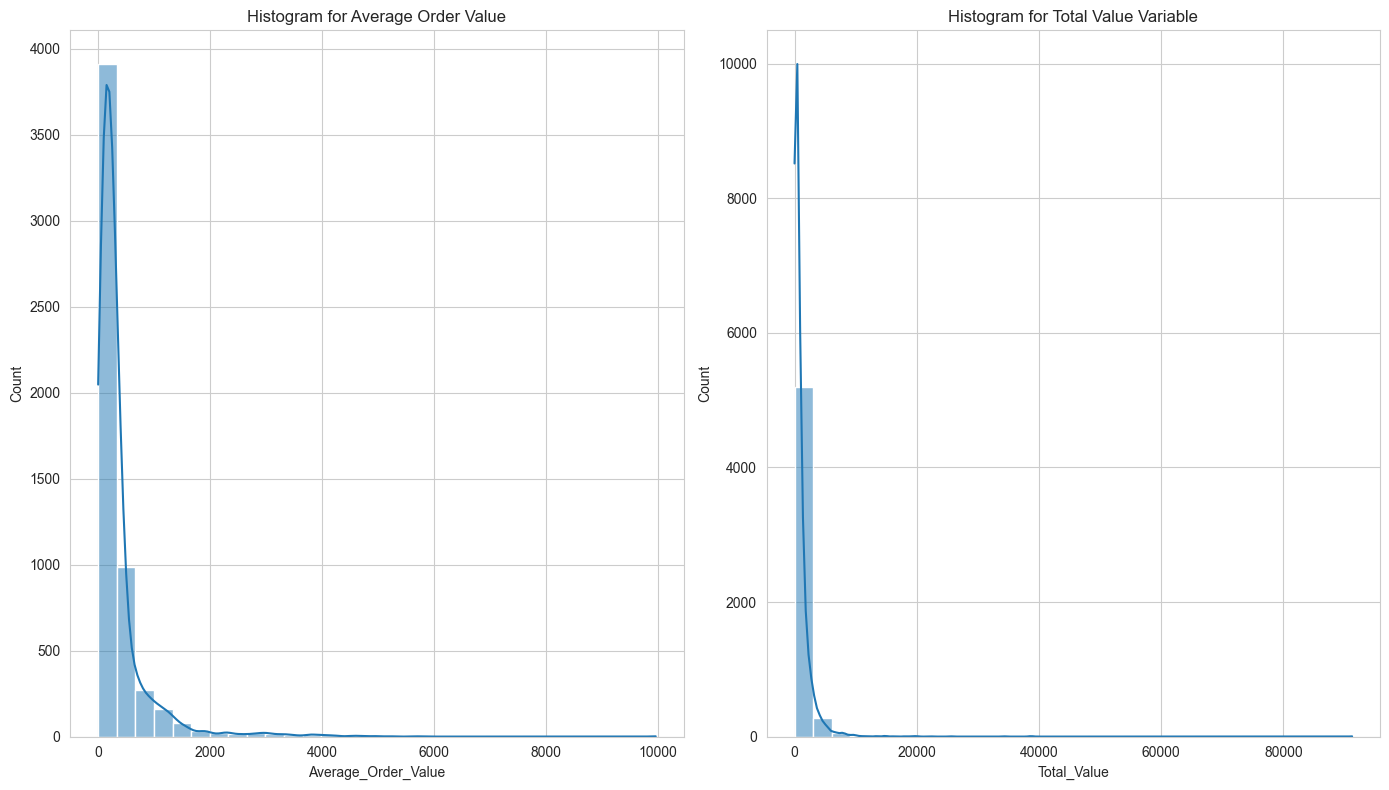

In [298]:
# plotting the distribution for unit price and quantity variables

fig, axes = plt.subplots(1, 2, figsize=(14, 8))

sns.histplot(features_final['Average_Order_Value'], kde=True, bins=30, ax=axes[0])
axes[0].set_title("Histogram for Average Order Value")

sns.histplot(features_final['Total_Value'], kde=True, bins=30, ax=axes[1])
axes[1].set_title("Histogram for Total Value Variable")

plt.tight_layout()
plt.show()

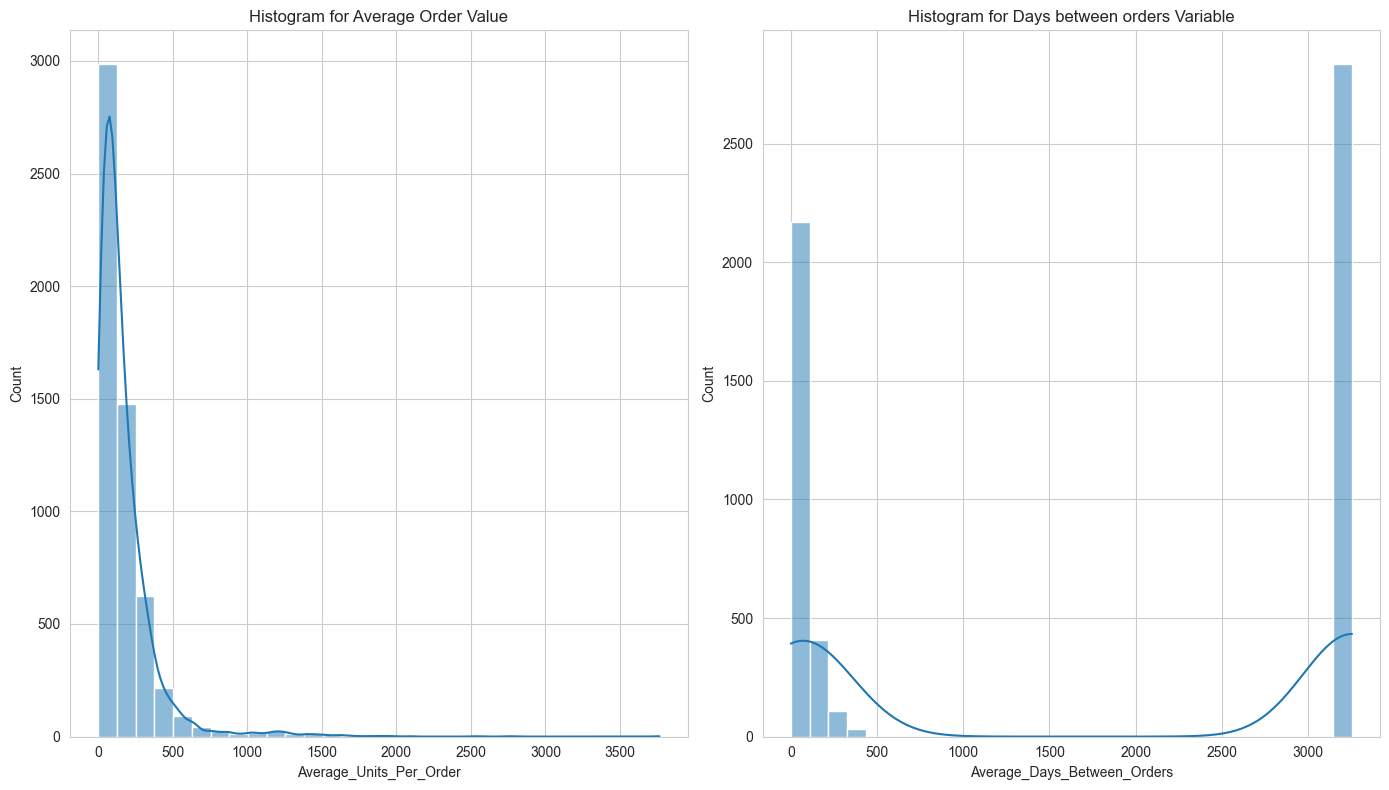

In [299]:
# plotting the distribution for unit price and quantity variables

fig, axes = plt.subplots(1, 2, figsize=(14, 8))

sns.histplot(features_final['Average_Units_Per_Order'], kde=True, bins=30, ax=axes[0])
axes[0].set_title("Histogram for Average Order Value")

sns.histplot(features_final['Average_Days_Between_Orders'], kde=True, bins=30, ax=axes[1])
axes[1].set_title("Histogram for Days between orders Variable")

plt.tight_layout()
plt.show()

Due to the high number of one time customers, I created different data sets to analyse the effect of these on the clustering performance. An idea would be to cluster customers for two segments, one time buyers and repeat customers

In [340]:
features_final.columns

Index(['Number_of_Orders', 'Average_Order_Value', 'Total_Value',
       'Average_Units_Per_Order', 'Different_Products',
       'Different_Unique_Products', 'TotalQuantities',
       'Average_Days_Between_Orders', 'RepeatCustomer'],
      dtype='object')

In [433]:
def remove_outliers_and_plot(df, variable, lower_bound, upper_bound):
    """
    Remove outliers from a dataframe based on the Interquartile Range (IQR) and plot boxplots before and after removal.
    
    Parameters:
    - df: The input dataframe from which to remove outliers.
    - variable: The name of the column to calculate IQR for.
    - lower_bound: The multiplier for the IQR below the first quartile.
    - upper_bound: The multiplier for the IQR above the third quartile.
    """
    # Calculate Q1, Q3, and IQR
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    is_outlier = ((df[variable] < (Q1 - lower_bound * IQR)) | (df[variable] > (Q3 + upper_bound * IQR)))

    # Plotting the boxplots before removing outliers
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    sns.boxplot(df[variable], ax=axes[0])
    axes[0].set_title(f'Boxplot for {variable} Before Outlier Removal')

    # Remove outliers
    df_filtered = df[~is_outlier]

    # Plotting the boxplots after removing outliers
    sns.boxplot(df_filtered[variable], ax=axes[1])
    axes[1].set_title(f'Boxplot for {variable} After Outlier Removal')

    plt.tight_layout()
    plt.show()

    # Calculate and print the number of rows removed
    rows_removed = df.shape[0] - df_filtered.shape[0]
    print(f"Number of rows removed by IQR method: {rows_removed}")

    return df_filtered

In [381]:
features_final.columns

Index(['Number_of_Orders', 'Average_Order_Value', 'Total_Value',
       'Average_Units_Per_Order', 'Different_Products',
       'Different_Unique_Products', 'TotalQuantities',
       'Average_Days_Between_Orders', 'RepeatCustomer'],
      dtype='object')

In [453]:
upperbound = 2

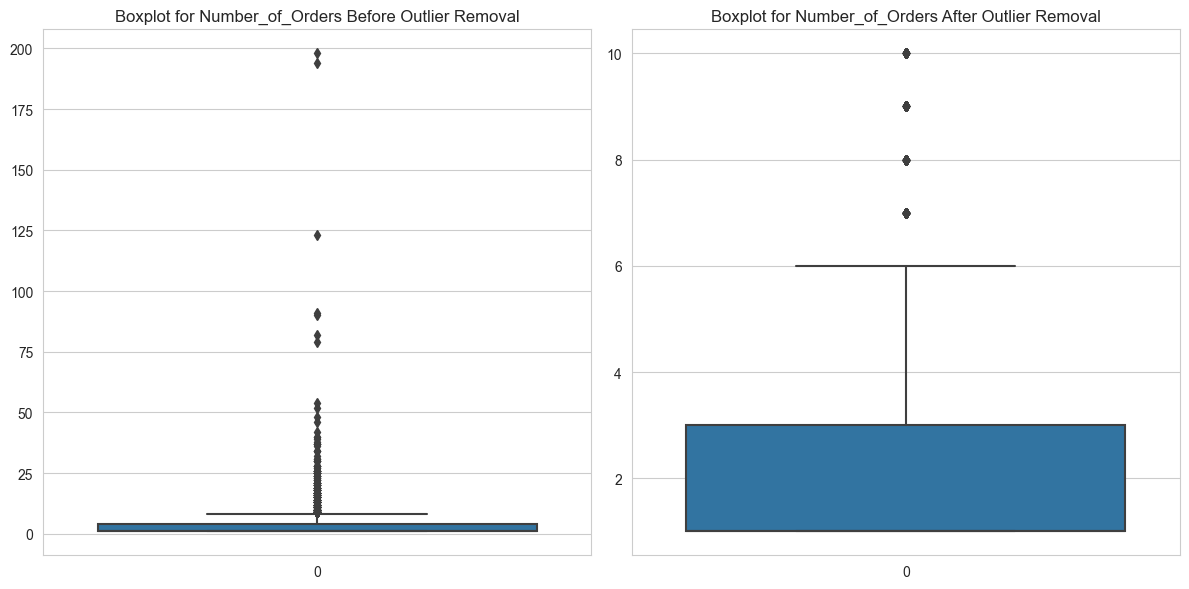

Number of rows removed by IQR method: 287


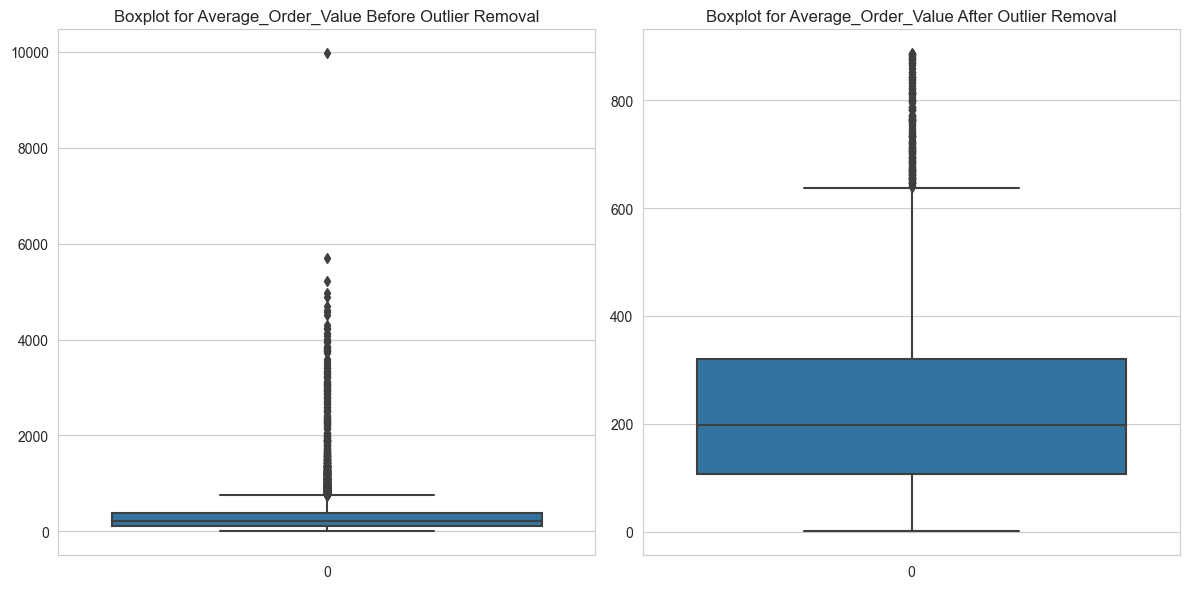

Number of rows removed by IQR method: 452


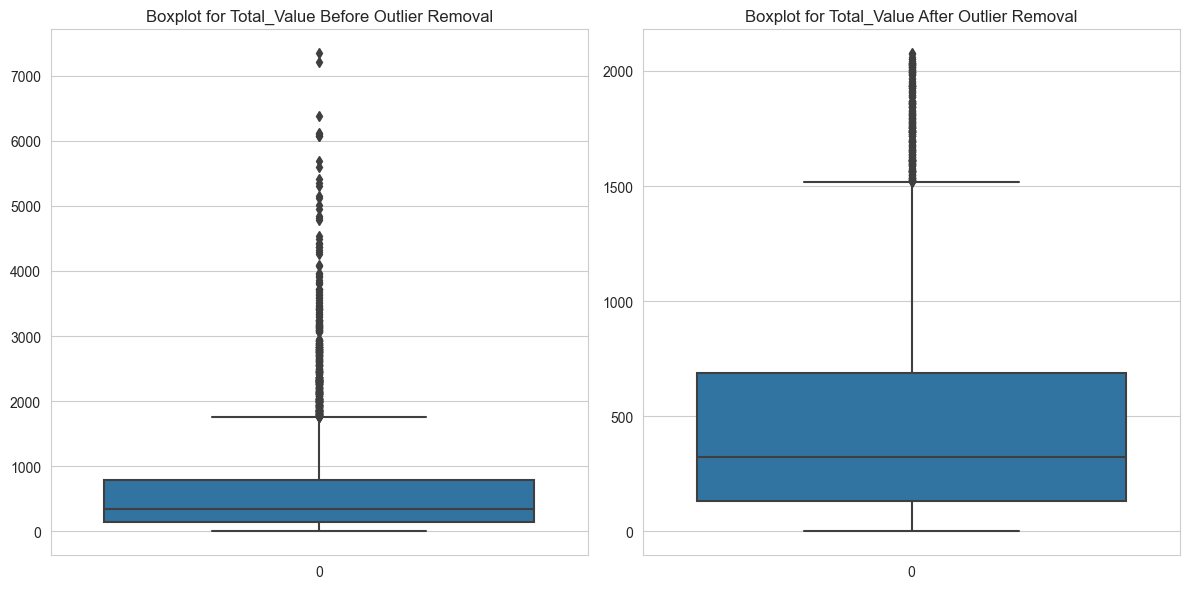

Number of rows removed by IQR method: 277


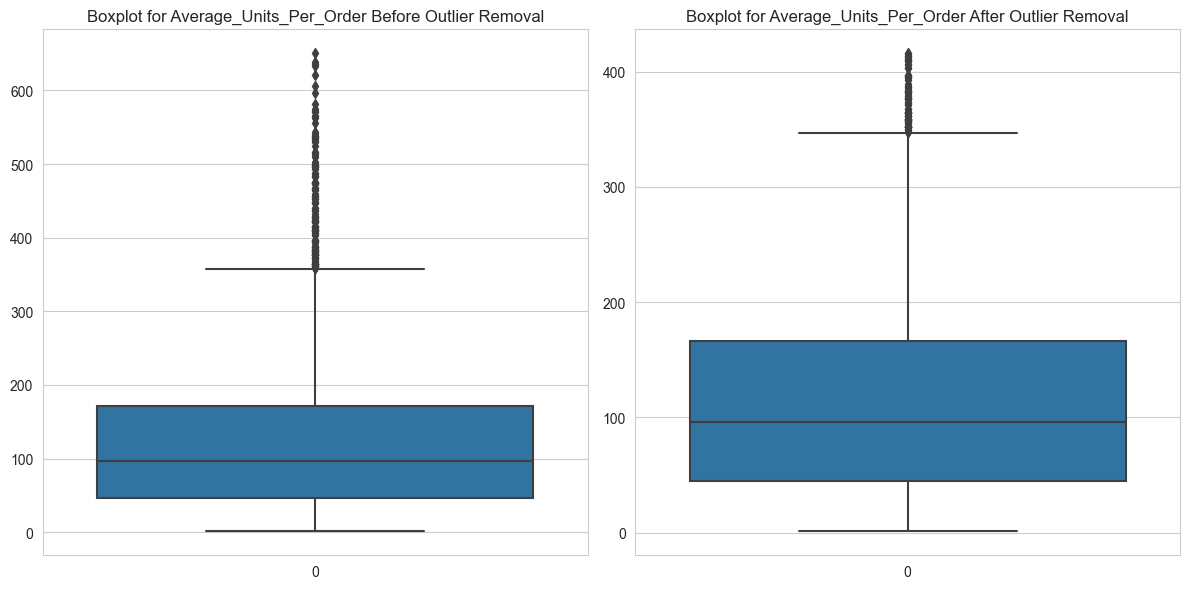

Number of rows removed by IQR method: 72


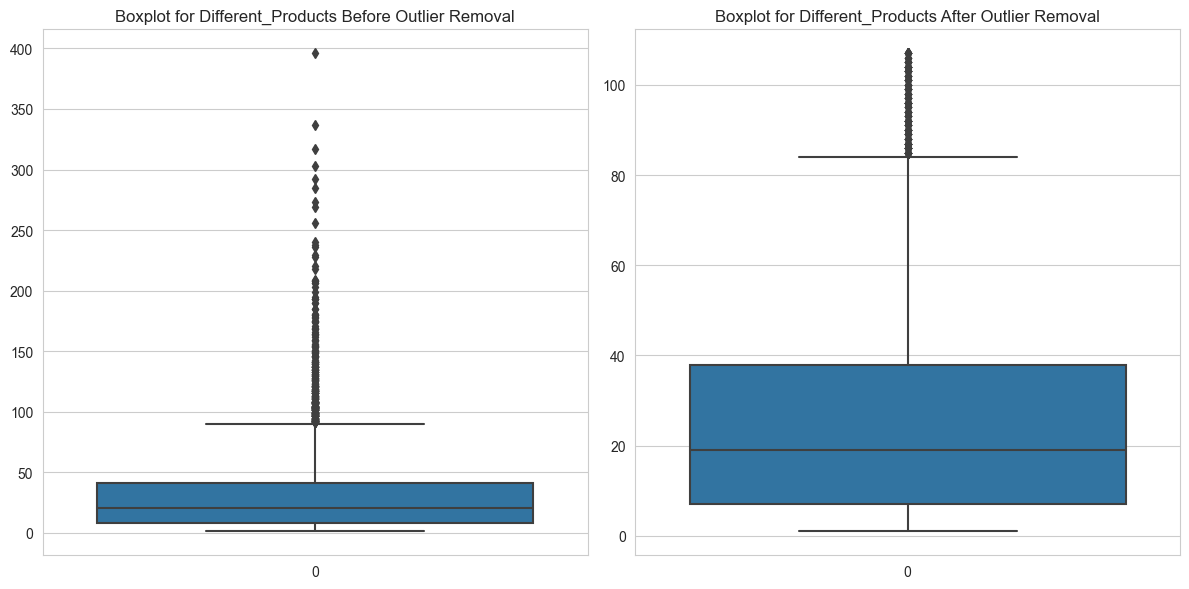

Number of rows removed by IQR method: 175


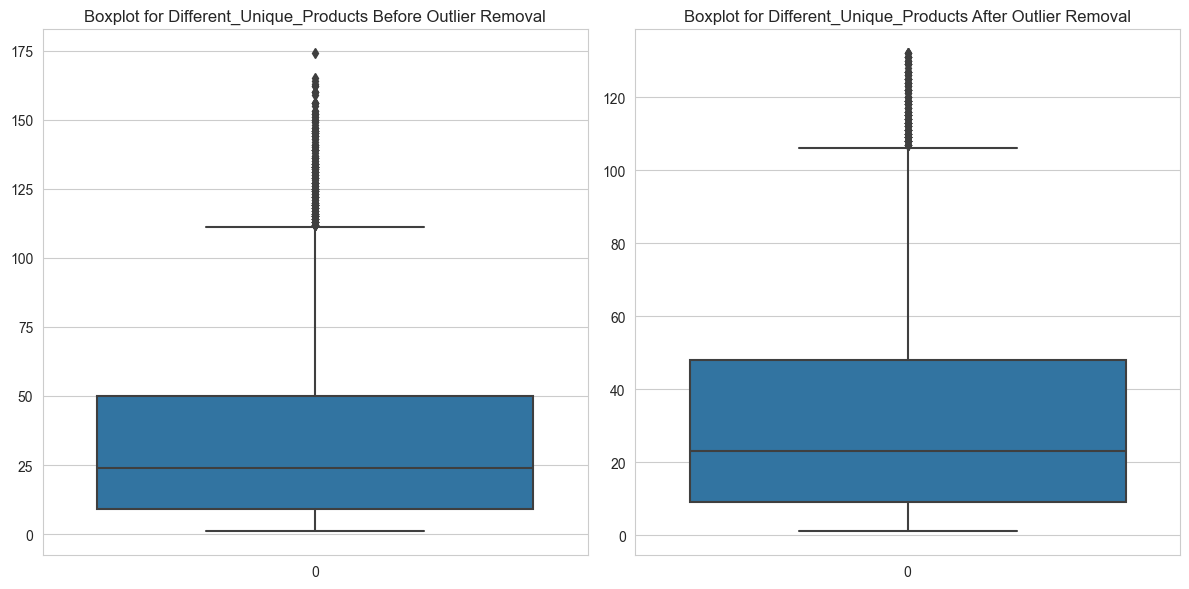

Number of rows removed by IQR method: 85


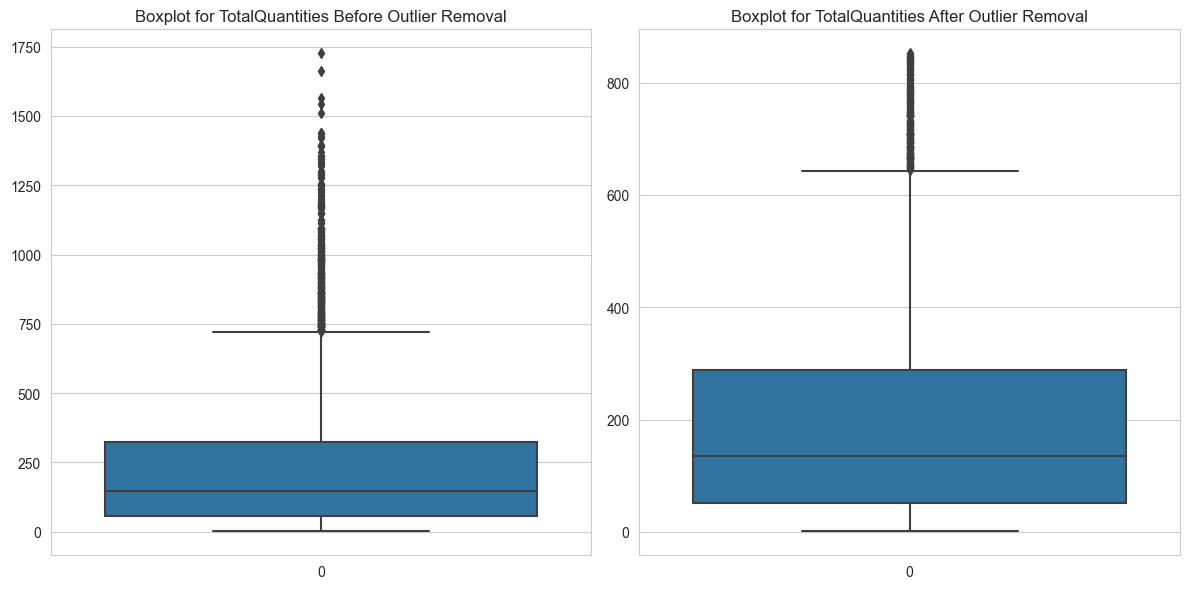

Number of rows removed by IQR method: 189


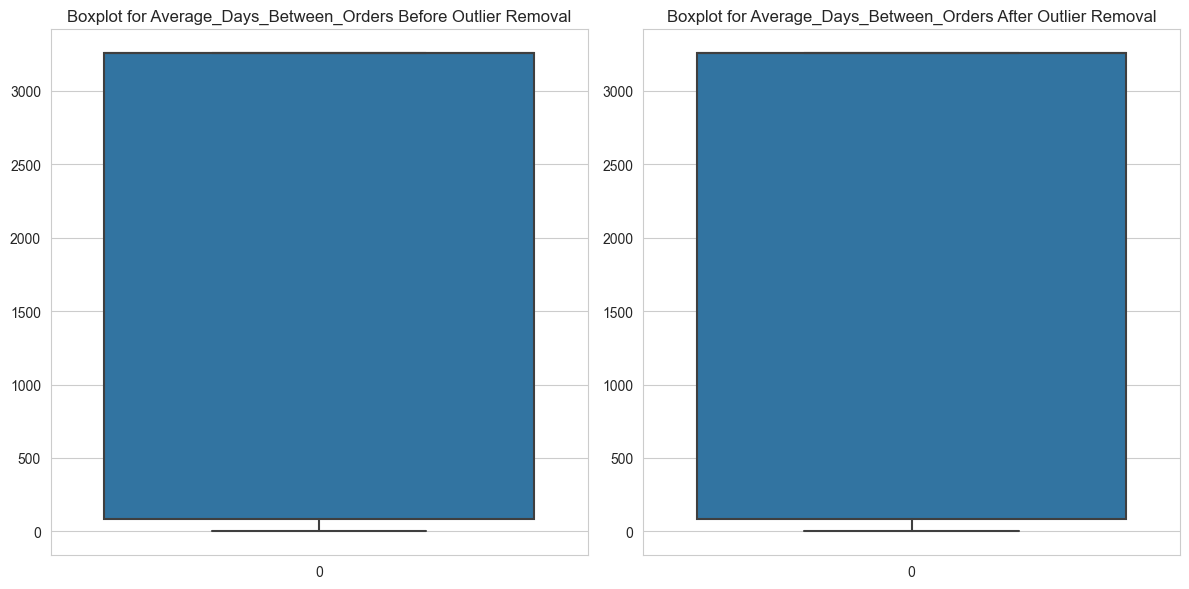

Number of rows removed by IQR method: 0


In [455]:
features_final_outlier_removal_1 = features_final.copy()
features_final_outlier_removal_1 = remove_outliers_and_plot(features_final_outlier_removal_1, 'Number_of_Orders', 1.5, upperbound)

features_final_outlier_removal_2 = features_final_outlier_removal_1.copy()
features_final_outlier_removal_2 = remove_outliers_and_plot(features_final_outlier_removal_2, 'Average_Order_Value', 1.5, upperbound)

features_final_outlier_removal_3 = features_final_outlier_removal_2.copy()
features_final_outlier_removal_3 = remove_outliers_and_plot(features_final_outlier_removal_3, 'Total_Value', 1.5, upperbound)

features_final_outlier_removal_4 = features_final_outlier_removal_3.copy()
features_final_outlier_removal_4 = remove_outliers_and_plot(features_final_outlier_removal_4, 'Average_Units_Per_Order', 1.5, upperbound)

features_final_outlier_removal_5 = features_final_outlier_removal_4.copy()
features_final_outlier_removal_5 = remove_outliers_and_plot(features_final_outlier_removal_5, 'Different_Products', 1.5, upperbound)

features_final_outlier_removal_6 = features_final_outlier_removal_5.copy()
features_final_outlier_removal_6 = remove_outliers_and_plot(features_final_outlier_removal_6, 'Different_Unique_Products', 1.5,upperbound)

features_final_outlier_removal_7 = features_final_outlier_removal_6.copy()
features_final_outlier_removal_7 = remove_outliers_and_plot(features_final_outlier_removal_7, 'TotalQuantities', 1.5, upperbound)

features_final_outlier_removal_8 = features_final_outlier_removal_7.copy()
features_final_outlier_removal_8 = remove_outliers_and_plot(features_final_outlier_removal_8, 'Average_Days_Between_Orders', 1.5,upperbound)

In [458]:
# Total Number of removed columns
total_removed_columns = features_final.shape[0] - features_final_outlier_removal_8.shape[0]
print(f"In total {total_removed_columns} outliers were removed by IQR")

In total 1537 outliers were removed by IQR


In [346]:
features_final.columns

Index(['Number_of_Orders', 'Average_Order_Value', 'Total_Value',
       'Average_Units_Per_Order', 'Different_Products',
       'Different_Unique_Products', 'TotalQuantities',
       'Average_Days_Between_Orders', 'RepeatCustomer'],
      dtype='object')

In [363]:
features_final.columns

Index(['Number_of_Orders', 'Average_Order_Value', 'Total_Value',
       'Average_Units_Per_Order', 'Different_Products',
       'Different_Unique_Products', 'TotalQuantities',
       'Average_Days_Between_Orders', 'RepeatCustomer'],
      dtype='object')

In [367]:
features_final.columns

Index(['Number_of_Orders', 'Average_Order_Value', 'Total_Value',
       'Average_Units_Per_Order', 'Different_Products',
       'Different_Unique_Products', 'TotalQuantities',
       'Average_Days_Between_Orders', 'RepeatCustomer'],
      dtype='object')

In [375]:
features_final_outlier_removal_5.columns

Index(['Number_of_Orders', 'Average_Order_Value', 'Total_Value',
       'Average_Units_Per_Order', 'Different_Products',
       'Different_Unique_Products', 'TotalQuantities',
       'Average_Days_Between_Orders', 'RepeatCustomer'],
      dtype='object')

#### Normalization

In [473]:
final_outlier_done = features_final_outlier_removal_8.copy()

In [474]:
# Normalizing features

from sklearn.preprocessing import StandardScaler

columns_to_scale = ["Average_Order_Value", "Total_Value", "Average_Units_Per_Order", "Different_Products", "Different_Unique_Products", "TotalQuantities", "Average_Days_Between_Orders"]
scaler = StandardScaler()
features_df_standardized_array = scaler.fit_transform(final_outlier_done[columns_to_scale])

features_df_standardized = pd.DataFrame(features_df_standardized_array, columns=columns_to_scale, index=final_outlier_done.index)

dropped_columns = final_outlier_done.drop(columns = columns_to_scale)

features_df_combined = features_df_standardized.join(dropped_columns)
#features_df_combined = features_df_combined.merge(country_customer, left_index=True, right_on='CustomerID')

# Combine the scaled features with the rest of your non-scaled data:
#non_scaled_features = [col for col in features_final.columns if col not in columns_to_scale]
#features_df_combined = features_final[non_scaled_features].reset_index(drop=True).join(features_df_standardized)

In [477]:
#features_df_combined = features_df_combined.set_index('CustomerID')


In [479]:
features_df_combined

,Average_Order_Value,Total_Value,Average_Units_Per_Order,Different_Products,Different_Unique_Products,TotalQuantities,Average_Days_Between_Orders,Number_of_Orders,RepeatCustomer
CustomerID,,,,,,,,,
12348.0,-1.101964,-0.804973,-0.685166,-0.814605,-0.857344,-0.308578,-1.188331,3,1
12350.0,0.632622,-0.229122,1.092728,-0.426622,-0.495790,-0.021785,0.856711,1,0
12352.0,-0.223603,2.176481,-0.386961,1.804280,1.348135,1.545333,-1.195679,7,1
12353.0,-1.106995,-0.976713,-1.074081,-1.008596,-1.001965,-0.953862,0.856711,1,0
12354.0,3.710189,1.093446,3.390498,0.397842,0.552716,0.966626,0.856711,1,0
...,...,...,...,...,...,...,...,...,...
19701.0,-1.264552,-1.044422,-1.228853,-1.057094,-1.038121,-1.020439,0.856711,1,0
19704.0,-1.144334,-0.992759,-1.097892,-0.766107,-0.785033,-0.964105,0.856711,1,0
19709.0,-1.181804,-1.008861,-1.074081,-1.008596,-0.821188,-0.953862,0.856711,1,0


In [480]:
features_final_original = features_df_combined.copy()

In [481]:
features_final_original

,Average_Order_Value,Total_Value,Average_Units_Per_Order,Different_Products,Different_Unique_Products,TotalQuantities,Average_Days_Between_Orders,Number_of_Orders,RepeatCustomer
CustomerID,,,,,,,,,
12348.0,-1.101964,-0.804973,-0.685166,-0.814605,-0.857344,-0.308578,-1.188331,3,1
12350.0,0.632622,-0.229122,1.092728,-0.426622,-0.495790,-0.021785,0.856711,1,0
12352.0,-0.223603,2.176481,-0.386961,1.804280,1.348135,1.545333,-1.195679,7,1
12353.0,-1.106995,-0.976713,-1.074081,-1.008596,-1.001965,-0.953862,0.856711,1,0
12354.0,3.710189,1.093446,3.390498,0.397842,0.552716,0.966626,0.856711,1,0
...,...,...,...,...,...,...,...,...,...
19701.0,-1.264552,-1.044422,-1.228853,-1.057094,-1.038121,-1.020439,0.856711,1,0
19704.0,-1.144334,-0.992759,-1.097892,-0.766107,-0.785033,-0.964105,0.856711,1,0
19709.0,-1.181804,-1.008861,-1.074081,-1.008596,-0.821188,-0.953862,0.856711,1,0


In [482]:

features_final_no_avgdays = features_df_combined.copy()
features_final_no_avgdays.drop(columns="Average_Days_Between_Orders", inplace=True)
features_final_no_avgdays


features_final_only_repeat = features_df_combined.copy()
features_final_only_repeat = features_df_combined[features_final_only_repeat['RepeatCustomer'] == 1].copy()
features_final_only_repeat.drop(columns=['RepeatCustomer'], inplace=True)
features_final_only_repeat


features_final_one_time = features_df_combined.copy()
features_final_one_time = features_final_one_time[features_final_one_time['RepeatCustomer'] == 0].copy()
features_final_one_time.drop(columns=['Average_Days_Between_Orders', 'RepeatCustomer', 'Number_of_Orders'], inplace=True)
features_final_one_time

,Average_Order_Value,Total_Value,Average_Units_Per_Order,Different_Products,Different_Unique_Products,TotalQuantities
CustomerID,,,,,,
12350.0,0.632622,-0.229122,1.092728,-0.426622,-0.495790,-0.021785
12353.0,-1.106995,-0.976713,-1.074081,-1.008596,-1.001965,-0.953862
12354.0,3.710189,1.093446,3.390498,0.397842,0.552716,0.966626
12355.0,0.137838,-0.441752,-0.288315,-0.911600,-0.748878,-0.615856
12361.0,-0.151551,-0.566116,-0.169259,-0.814605,-0.748878,-0.564643
...,...,...,...,...,...,...
19701.0,-1.264552,-1.044422,-1.228853,-1.057094,-1.038121,-1.020439
19704.0,-1.144334,-0.992759,-1.097892,-0.766107,-0.785033,-0.964105
19709.0,-1.181804,-1.008861,-1.074081,-1.008596,-0.821188,-0.953862


#### Model Building

In [ ]:
# Data sets for model building:

# Original dataset with all customers: 
# features_final_original

# Datasets for segmented clustering with seperate data sets for one time and repeat customers
# features_final_one_time, features_final_only_repeat

# Third test with a dataset without a frequency feature:
# features_final_no_avgdays

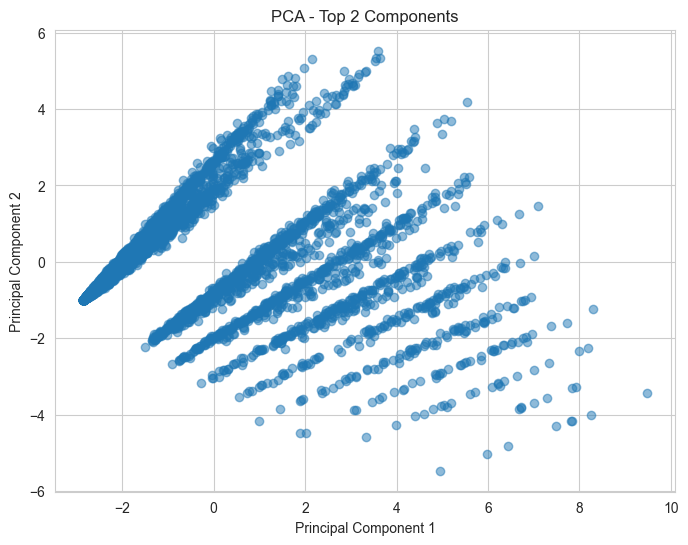

In [483]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # We want to reduce to 2 components for visualization
pca_features = pca.fit_transform(features_final_original)

# Step 2: Visualize with PCA components
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Top 2 Components')
plt.show()

/Users/simon/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


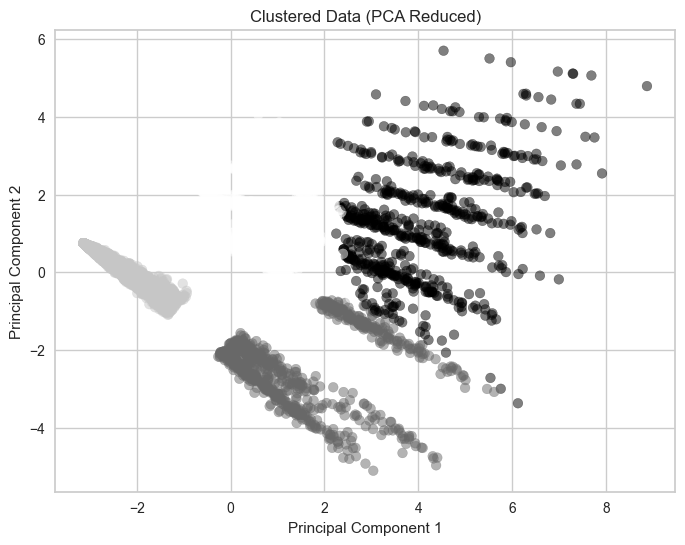

In [499]:
# Assuming you've chosen k already (replace with your chosen k or elbow method result)
k = 4

# Step 4: Perform K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(features_final_original)  # You can use pca_features instead if you want to cluster based on the top 2 PCA components

# Add the cluster labels back into the original standardized DataFrame
features_final_original['Cluster'] = clusters

# Step 5: Visualize the clustered data (if using 2 PCA components for clustering)
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clusters, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustered Data (PCA Reduced)')
plt.show()

/Users/simon/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/simon/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/simon/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/simon/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/simon/anacond

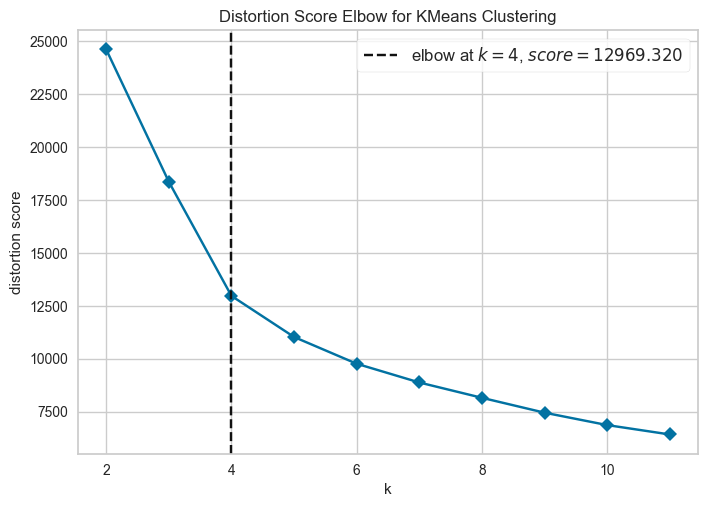

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [500]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Assuming X is your dataset prepared for clustering (features_final_original)
# Make sure X is scaled or preprocessed according to your requirements

# Instantiate the clustering model and visualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,12), timings=False)

visualizer.fit(features_final_original)    # Fit the data to the visualizer
visualizer.show()    # Draw/show the data


/Users/simon/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/simon/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/simon/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/simon/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/simon/anacond

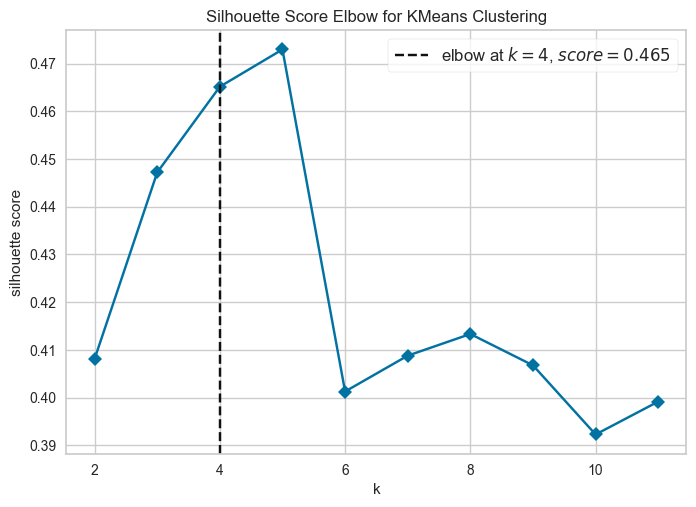

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [496]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Assuming X is your dataset prepared for clustering (features_final_original)
# Make sure X is scaled or preprocessed according to your requirements

# Instantiate the clustering model and visualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette', timings=False)

visualizer.fit(features_final_original)    # Fit the data to the visualizer
visualizer.show()    # Draw/show the data

/Users/simon/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/simon/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/simon/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/simon/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/simon/anacond

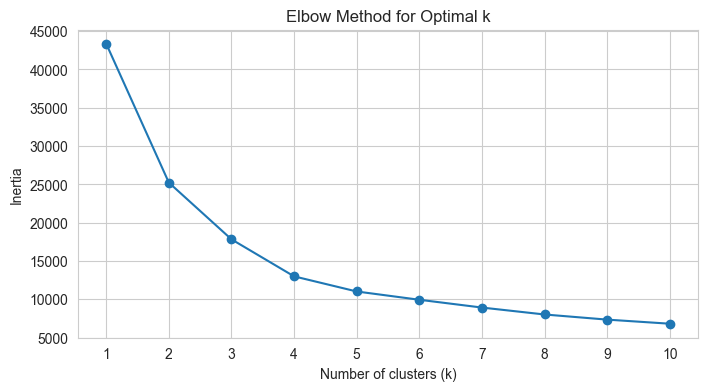

/Users/simon/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/simon/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/simon/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/simon/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/simon/anacond

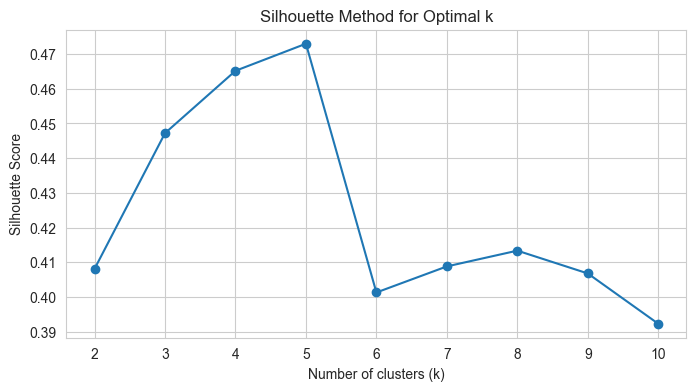

In [491]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming features_final_original is your dataset ready for clustering
# Ensure you've already performed necessary preprocessing like scaling

# Step 1: Elbow Method - Calculate Inertia for a range of k values
inertia = []
k_range = range(1, 11)  # You can adjust the range as needed

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_final_original)  # Assuming features_final_original is preprocessed appropriately
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.show()

# Step 2: Silhouette Method - Calculate Silhouette Score for a range of k values
silhouette_scores = []

# Avoid computing silhouette score for k=1 as it's not defined
for k in range(2, 11):  # Adjust range as needed, starting from 2 since silhouette score cannot be calculated for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(features_final_original)
    score = silhouette_score(features_final_original, clusters)
    silhouette_scores.append(score)

# Plotting the Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')  # Adjust range as needed
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.xticks(range(2, 11))  # Adjust range as needed
plt.show()


In [ ]:

# Step 3: Determine the number of clusters
# This would typically involve using something like the elbow method, but here we'll assume k
# For the elbow method, you'd plot the inertia for a range of k values and look for the "elbow" point

# Assuming you've chosen k already (replace with your chosen k or elbow method result)
k = 3

# Step 4: Perform K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(features_final_original)  # You can use pca_features instead if you want to cluster based on the top 2 PCA components

# Add the cluster labels back into the original standardized DataFrame
features_final_original['Cluster'] = clusters

# Step 5: Visualize the clustered data (if using 2 PCA components for clustering)
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clusters, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustered Data (PCA Reduced)')
plt.show()


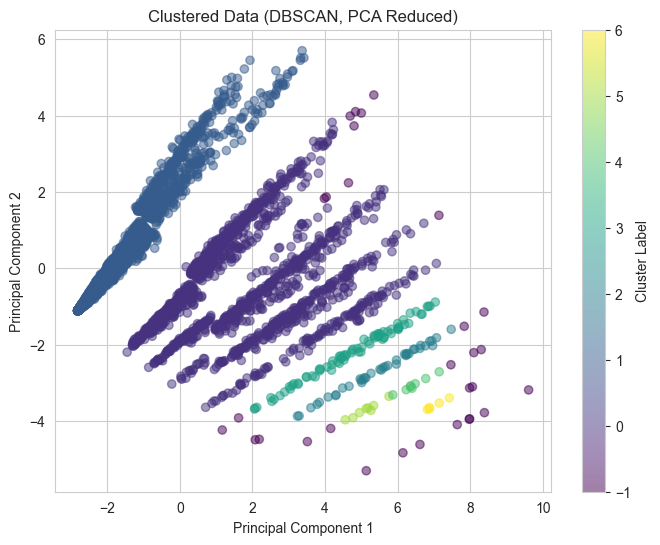

In [487]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Optional: Reduce dimensionality with PCA to visualize in 2D (if you have more than 2 features)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features_final_original)

# Step 2: Perform DBSCAN clustering
# eps and min_samples need to be chosen based on your data
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(pca_features)  # You can use features_scaled directly if not using PCA for clustering

# Add the cluster labels back into a copy of the original DataFrame for visualization
features_final_with_clusters = features_final_original.copy()
features_final_with_clusters['Cluster'] = clusters

# Step 3: Visualize the clustered data (especially useful if you used PCA for clustering)
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustered Data (DBSCAN, PCA Reduced)')
plt.colorbar(label='Cluster Label')
plt.show()

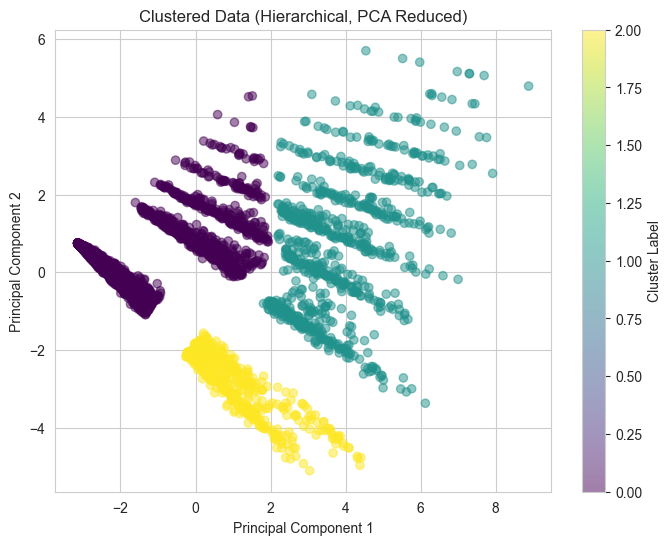

In [490]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming features_final_original is your DataFrame and it's ready for clustering

# Step 1: Standardize the features (if not already done)
#scaler = StandardScaler()
#features_scaled = scaler.fit_transform(features_final_original)

# Optional: Reduce dimensionality with PCA to visualize in 2D (if you have more than 2 features)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features_final_original)

# Step 2: Perform Hierarchical clustering
# Choose the number of clusters and the linkage criterion
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = hierarchical.fit_predict(pca_features)  # You can use features_scaled directly if not using PCA for clustering

# Add the cluster labels back into a copy of the original DataFrame for visualization
features_final_with_clusters = features_final_original.copy()
features_final_with_clusters['Cluster'] = clusters

# Step 3: Visualize the clustered data (especially useful if you used PCA for clustering)
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustered Data (Hierarchical, PCA Reduced)')
plt.colorbar(label='Cluster Label')
plt.show()

##### Original Dataset with all features and all customers

#### Q2.2 Build a second model to segment costumers and compare the performance. (10 points)

#### Q2.3 Based on the analysis, suggest a number of clusters and their characteristics to the head of marketing. Please justify your decisions. (10 points)

## Question 3: Create a recommendation system that helps the company to increase sales (35 points)


#### Q3.1 Build the recommendation system. (25 points)

#### Q3.2 Based on the analysis, suggest how the model can be used in marketing. Which data would you like to have to improve the results? Please justify your decisions. (10 points)